In [1]:
!nvidia-smi

Thu Apr 16 00:37:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN X (Pascal)    Off  | 00000000:04:00.0 Off |                  N/A |
| 18%   33C    P0    56W / 250W |      0MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN X (Pascal)    Off  | 00000000:05:00.0 Off |                  N/A |
| 19%   35C    P0    55W / 250W |      0MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='2, 3'
print('This programme is using GPU 2, 3')

This programme is using GPU 2, 3


In [3]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import MultiStepLR

import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
import sys
sys.path.append('../')

from utils.ImageDisplay import show_some, imshow
from utils.ModelSummary import summarize
from utils.storage import save_trained, load_trained
from utils.dataset import DifferentTargetSceneDataset

In [5]:
train_dataset = DifferentTargetSceneDataset( locations = ["scene_abandonned_city_54"],
                                             input_colors = ['3500'], #ideally do all colors, but its too long 
                                             input_directions = ['S'], #ideally do all directions, but its too long 
                                             target_colors = ['2500'], #ideally do all colors, but its too long 
                                             target_directions = ['SE'], #ideally do all directions, but its too long 
                                             data_path = '../../VIDIT/train/',
                                             transform = transforms.Resize(128)
                                             )
#test_dataset = ImageDataset( dataPath = '../../../VIDIT/validate/',
#                             transform = transforms.Resize(128))
train_dataloader = DataLoader(train_dataset, batch_size=70, shuffle=True, num_workers=8)
#test_dataloader = DataLoader(test_dataset, batch_size=50, shuffle=True, num_workers=8)

100%|██████████| 54/54 [00:14<00:00,  3.80it/s]


In [6]:
from models.anOtherSwapNet import SwapModel
model = SwapModel().cuda()
#model.load_state_dict(torch.load('./OneImageDispNet_SouthEast2SouthWithDataLoader.pth'))
distance = nn.MSELoss().cuda() #We can modify this, eg input and output must have same edges, we should experiment differents ones
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5) #Weight Decay is L2 Regularization
#scheduler = MultiStepLR(optimizer, milestones=[3000,8000,13000,18000], gamma=0.1) #divide learning rate by 10 at each milestone

In [7]:
#defining some params
num_epochs = 10 #you can go for more epochs

------------- training --------------- epoch: 1
input tensor(0)


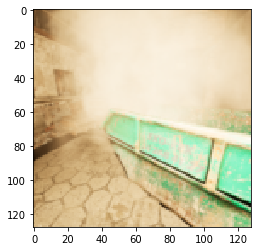

target tensor(45)


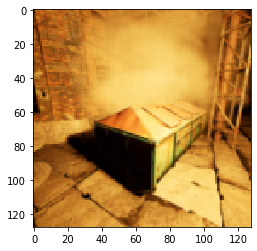

prediction


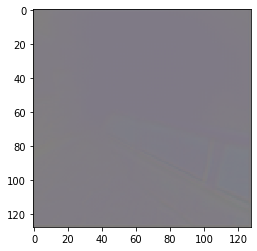

groundtruth tensor(45)


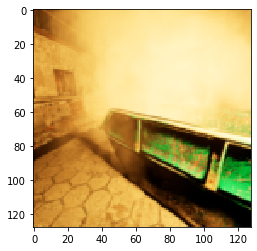

epoch [1/10], batch [1/41], loss_pred_gt:169.1309, loss_scenes:0.0000, loss_illuminations:0.0000, score:0.1420
epoch [1/10], batch [11/41], loss_pred_gt:149.6313, loss_scenes:0.0000, loss_illuminations:0.0000, score:0.1949
epoch [1/10], batch [21/41], loss_pred_gt:104.8535, loss_scenes:0.0000, loss_illuminations:0.0000, score:0.2468
epoch [1/10], batch [31/41], loss_pred_gt:47.9543, loss_scenes:0.0000, loss_illuminations:0.0000, score:0.5195
epoch [1/10], batch [41/41], loss_pred_gt:38.8615, loss_scenes:0.0000, loss_illuminations:0.0000, score:0.5770
------------- training --------------- epoch: 2
input tensor(0)


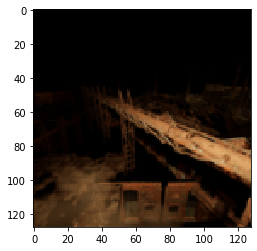

target tensor(45)


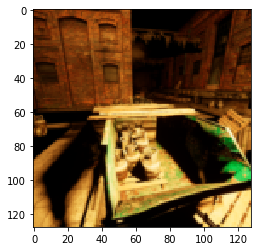

prediction


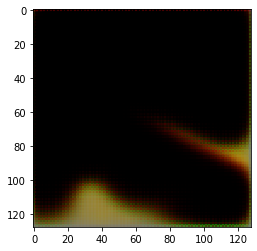

groundtruth tensor(45)


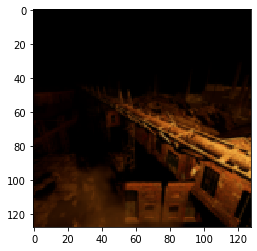

epoch [2/10], batch [1/41], loss_pred_gt:37.7677, loss_scenes:0.0000, loss_illuminations:0.0000, score:0.6569
epoch [2/10], batch [11/41], loss_pred_gt:31.5446, loss_scenes:0.0000, loss_illuminations:0.0000, score:0.6989
epoch [2/10], batch [21/41], loss_pred_gt:31.9580, loss_scenes:0.0000, loss_illuminations:0.0000, score:0.9353
epoch [2/10], batch [31/41], loss_pred_gt:25.5916, loss_scenes:0.0000, loss_illuminations:0.0000, score:0.9743
epoch [2/10], batch [41/41], loss_pred_gt:21.0446, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.1584
------------- training --------------- epoch: 3
input tensor(0)


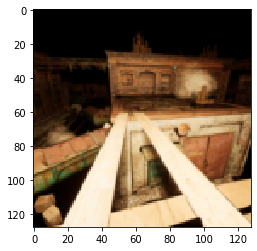

target tensor(45)


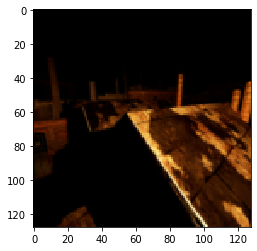

prediction


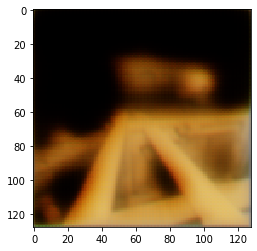

groundtruth tensor(45)


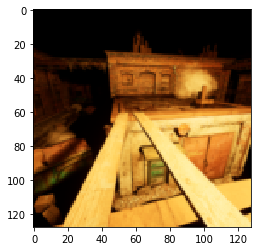

epoch [3/10], batch [1/41], loss_pred_gt:27.7766, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.0876
epoch [3/10], batch [11/41], loss_pred_gt:20.6357, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.1684
epoch [3/10], batch [21/41], loss_pred_gt:20.1553, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.2915
epoch [3/10], batch [31/41], loss_pred_gt:20.4491, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.3038
epoch [3/10], batch [41/41], loss_pred_gt:18.2061, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.3576
------------- training --------------- epoch: 4
input tensor(0)


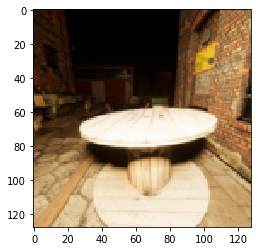

target tensor(45)


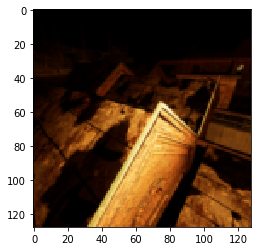

prediction


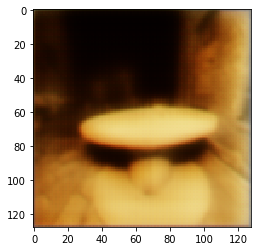

groundtruth tensor(45)


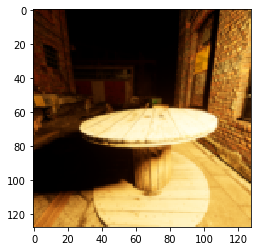

epoch [4/10], batch [1/41], loss_pred_gt:18.2734, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.4527
epoch [4/10], batch [11/41], loss_pred_gt:17.1890, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.5775
epoch [4/10], batch [21/41], loss_pred_gt:15.4264, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.6443
epoch [4/10], batch [31/41], loss_pred_gt:15.3604, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.8159
epoch [4/10], batch [41/41], loss_pred_gt:17.4967, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.5695
------------- training --------------- epoch: 5
input tensor(0)


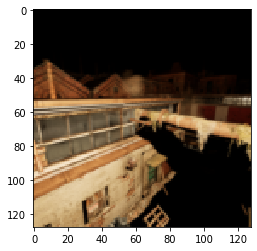

target tensor(45)


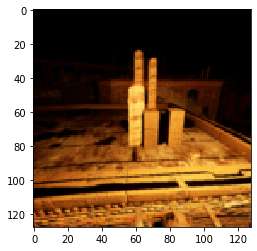

prediction


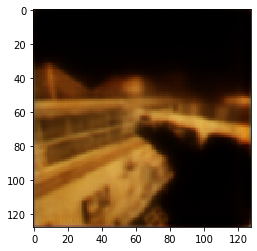

groundtruth tensor(45)


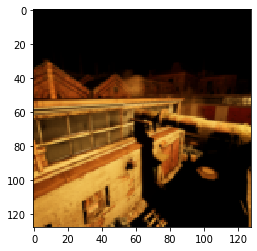

epoch [5/10], batch [1/41], loss_pred_gt:14.0984, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.8611
epoch [5/10], batch [11/41], loss_pred_gt:14.1018, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.8025
epoch [5/10], batch [21/41], loss_pred_gt:14.8311, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.5535
epoch [5/10], batch [31/41], loss_pred_gt:12.6202, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.8587
epoch [5/10], batch [41/41], loss_pred_gt:11.2579, loss_scenes:0.0000, loss_illuminations:0.0000, score:2.1834
------------- training --------------- epoch: 6
input tensor(0)


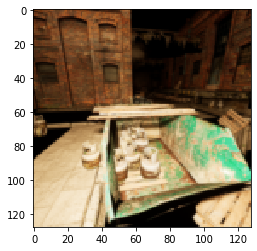

target tensor(45)


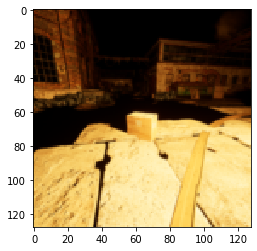

prediction


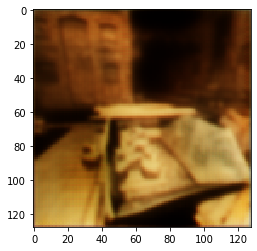

groundtruth tensor(45)


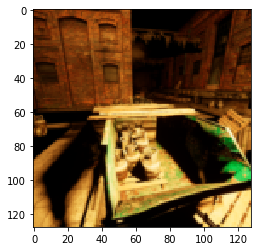

epoch [6/10], batch [1/41], loss_pred_gt:13.3528, loss_scenes:0.0000, loss_illuminations:0.0000, score:2.0239
epoch [6/10], batch [11/41], loss_pred_gt:12.0499, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.8771
epoch [6/10], batch [21/41], loss_pred_gt:12.9371, loss_scenes:0.0000, loss_illuminations:0.0000, score:1.8148
epoch [6/10], batch [31/41], loss_pred_gt:10.8247, loss_scenes:0.0000, loss_illuminations:0.0000, score:2.2938
epoch [6/10], batch [41/41], loss_pred_gt:10.1015, loss_scenes:0.0000, loss_illuminations:0.0000, score:2.5485
------------- training --------------- epoch: 7
input tensor(0)


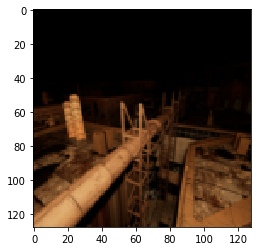

target tensor(45)


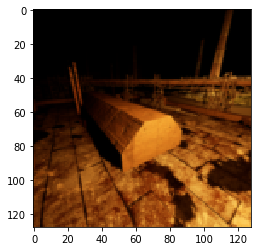

prediction


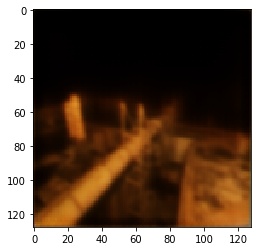

groundtruth tensor(45)


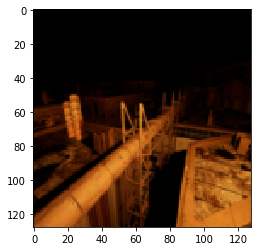

epoch [7/10], batch [1/41], loss_pred_gt:9.0707, loss_scenes:0.0000, loss_illuminations:0.0000, score:2.6538
epoch [7/10], batch [11/41], loss_pred_gt:8.4290, loss_scenes:0.0000, loss_illuminations:0.0000, score:2.8446
epoch [7/10], batch [21/41], loss_pred_gt:8.0481, loss_scenes:0.0000, loss_illuminations:0.0000, score:3.4872
epoch [7/10], batch [31/41], loss_pred_gt:8.1524, loss_scenes:0.0000, loss_illuminations:0.0000, score:3.4189
epoch [7/10], batch [41/41], loss_pred_gt:6.9871, loss_scenes:0.0000, loss_illuminations:0.0000, score:3.5690
------------- training --------------- epoch: 8
input tensor(0)


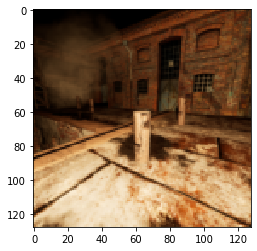

target tensor(45)


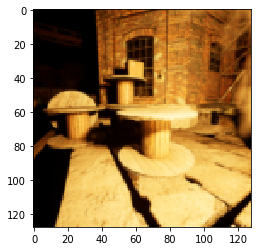

prediction


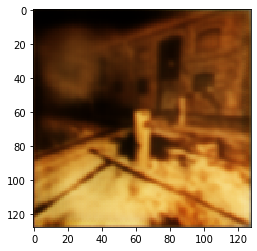

groundtruth tensor(45)


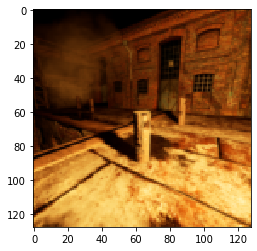

epoch [8/10], batch [1/41], loss_pred_gt:7.2405, loss_scenes:0.0000, loss_illuminations:0.0000, score:3.1018
epoch [8/10], batch [11/41], loss_pred_gt:7.9424, loss_scenes:0.0000, loss_illuminations:0.0000, score:3.0798
epoch [8/10], batch [21/41], loss_pred_gt:7.7815, loss_scenes:0.0000, loss_illuminations:0.0000, score:3.0905
epoch [8/10], batch [31/41], loss_pred_gt:6.5499, loss_scenes:0.0000, loss_illuminations:0.0000, score:3.3518
epoch [8/10], batch [41/41], loss_pred_gt:7.0832, loss_scenes:0.0000, loss_illuminations:0.0000, score:3.8788
------------- training --------------- epoch: 9


In [ ]:
def angle(angle1, angle2):
    # https://discuss.pytorch.org/t/custom-loss-function-for-discontinuous-angle-calculation/58579
    return 1. - torch.cos((angle1 - angle2)/180*3.14) 
    


def train(epoch):
    print('------------- training --------------- epoch:', epoch+1)
    epoch_loss = 0
    for i,data in enumerate(train_dataloader):
        inp, out = data
        img1 = inp[0]['image'].cuda()
        img2 = inp[1]['image'].cuda()
        groundtruth = out['image'].cuda()
        # ===================forward=====================
        scene_gt, scene_img1, scene_img2,\
        illumination_gt, illumination_img1, illumination_img2,\
        ill_pred_gt, ill_pred_img1, ill_pred_img2,\
        prediction = model(img1, img2, groundtruth)
        loss1 = distance(prediction, groundtruth) 
        loss2 = distance(scene_gt, scene_img1)
        loss3 = distance(F.normalize(illumination_gt, p=2, dim=1), F.normalize(illumination_img2, p=2, dim=1))
        #loss4 = angle(ill_pred_gt[:,0,0,0], out['color'].cuda())
        #loss5 = distance(ill_pred_gt[:,1,0,0], out['direction'].cuda())
        loss = loss1 + loss2 + loss3 #+ loss4 + loss5
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #scheduler.step()
        # ===================log========================
        epoch_loss += 1000*loss.data
        if i%100==0: 
            print("input", inp[0]['direction'][0])
            implotin = plt.imshow(inp[0]['image'].detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("target", inp[1]['direction'][0])
            implotin2 = plt.imshow(inp[1]['image'].detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("prediction")
            implotpred = plt.imshow(prediction.cpu().detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("groundtruth", out['direction'][0])
            implotgt = plt.imshow(groundtruth.cpu().detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
        if i%10==0: 
            print('epoch [{}/{}], batch [{}/{}], loss_pred_gt:{:.4f}, loss_scenes:{:.4f}, loss_illuminations:{:.4f}, score:{:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataloader), 1000*loss1.data, loss2.data, loss3.data, distance(inp[0]['image'].cuda(), groundtruth).data/loss1.data))


for epoch in range(num_epochs):
    train(epoch)
    if epoch%1 == 0:
        PATH = './Experiment2-Swap-Resize128-NtoN'+str(epoch)+'.pth'
        torch.save(model.state_dict(), PATH)
        
        
        
print('Finished Training')